In [1]:
! pip install transformers[torch]
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
!wget https://storage.googleapis.com/crowdstf-rico-uiuc-4540/rico_dataset_v0.1/unique_uis.tar.gz

--2024-09-27 17:11:06--  https://storage.googleapis.com/crowdstf-rico-uiuc-4540/rico_dataset_v0.1/unique_uis.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6471262799 (6.0G) [application/x-tar]
Saving to: ‘unique_uis.tar.gz’

unique_uis.tar.gz   100%[===================>]   6.03G  19.9MB/s    in 5m 10s  

2024-09-27 17:16:17 (19.9 MB/s) - ‘unique_uis.tar.gz’ saved [6471262799/6471262799]



In [168]:
from transformers import PaliGemmaProcessor, PaliGemmaForConditionalGeneration,TrainingArguments, Trainer
from datasets import load_dataset
from PIL import Image

model_id = "google/paligemma-3b-pt-224"
processor = PaliGemmaProcessor.from_pretrained(model_id)
dataset = load_dataset("nickhobbs09/screen-ai-annotation")

In [12]:
dataset['train'][0]

{'screen_id': 39382,
 'screen_annotation': 'TEXT Currency code 79 923 78 111, LIST_ITEM 45 955 116 179 (RADIO_BUTTON 93 160 129 166, LABEL USD 205 305 131 163), LIST_ITEM 43 955 181 245 (RADIO_BUTTON 97 157 196 230, LABEL UYU 202 306 198 229), LIST_ITEM 42 958 247 310 (RADIO_BUTTON 96 155 263 296, LABEL UZS 203 303 264 294), LIST_ITEM 43 957 313 376 (RADIO_BUTTON 96 156 328 361, LABEL VEB 206 303 330 360), LIST_ITEM 41 959 379 441 (RADIO_BUTTON 97 156 394 428, LABEL VND 205 308 395 425), LIST_ITEM 42 959 444 507 (RADIO_BUTTON 95 155 458 493, LABEL VUV 205 307 461 491), LIST_ITEM 42 957 510 573 (RADIO_BUTTON 95 157 524 558, LABEL WST 206 312 528 557), LIST_ITEM 43 959 576 638 (RADIO_BUTTON 95 155 589 623, LABEL XAF 204 302 593 623), LIST_ITEM 43 958 641 703 (RADIO_BUTTON 95 156 656 689, LABEL XCD 204 305 659 688), LIST_ITEM 42 959 706 769 (RADIO_BUTTON 95 156 721 755, LABEL XOF 203 301 725 753), LIST_ITEM 43 959 772 835 (RADIO_BUTTON 96 156 786 820, LABEL XPF 204 300 791 820), LIST_ITEM

In [35]:
dataset['train'][0]['image'].draft(mode='RGB', size='1080x1920')

In [169]:
dataset

DatasetDict({
    train: Dataset({
        features: ['screen_id', 'screen_annotation', 'image'],
        num_rows: 15548
    })
})

In [22]:
import numpy as np

In [74]:
image = dataset['train'][0]['image']

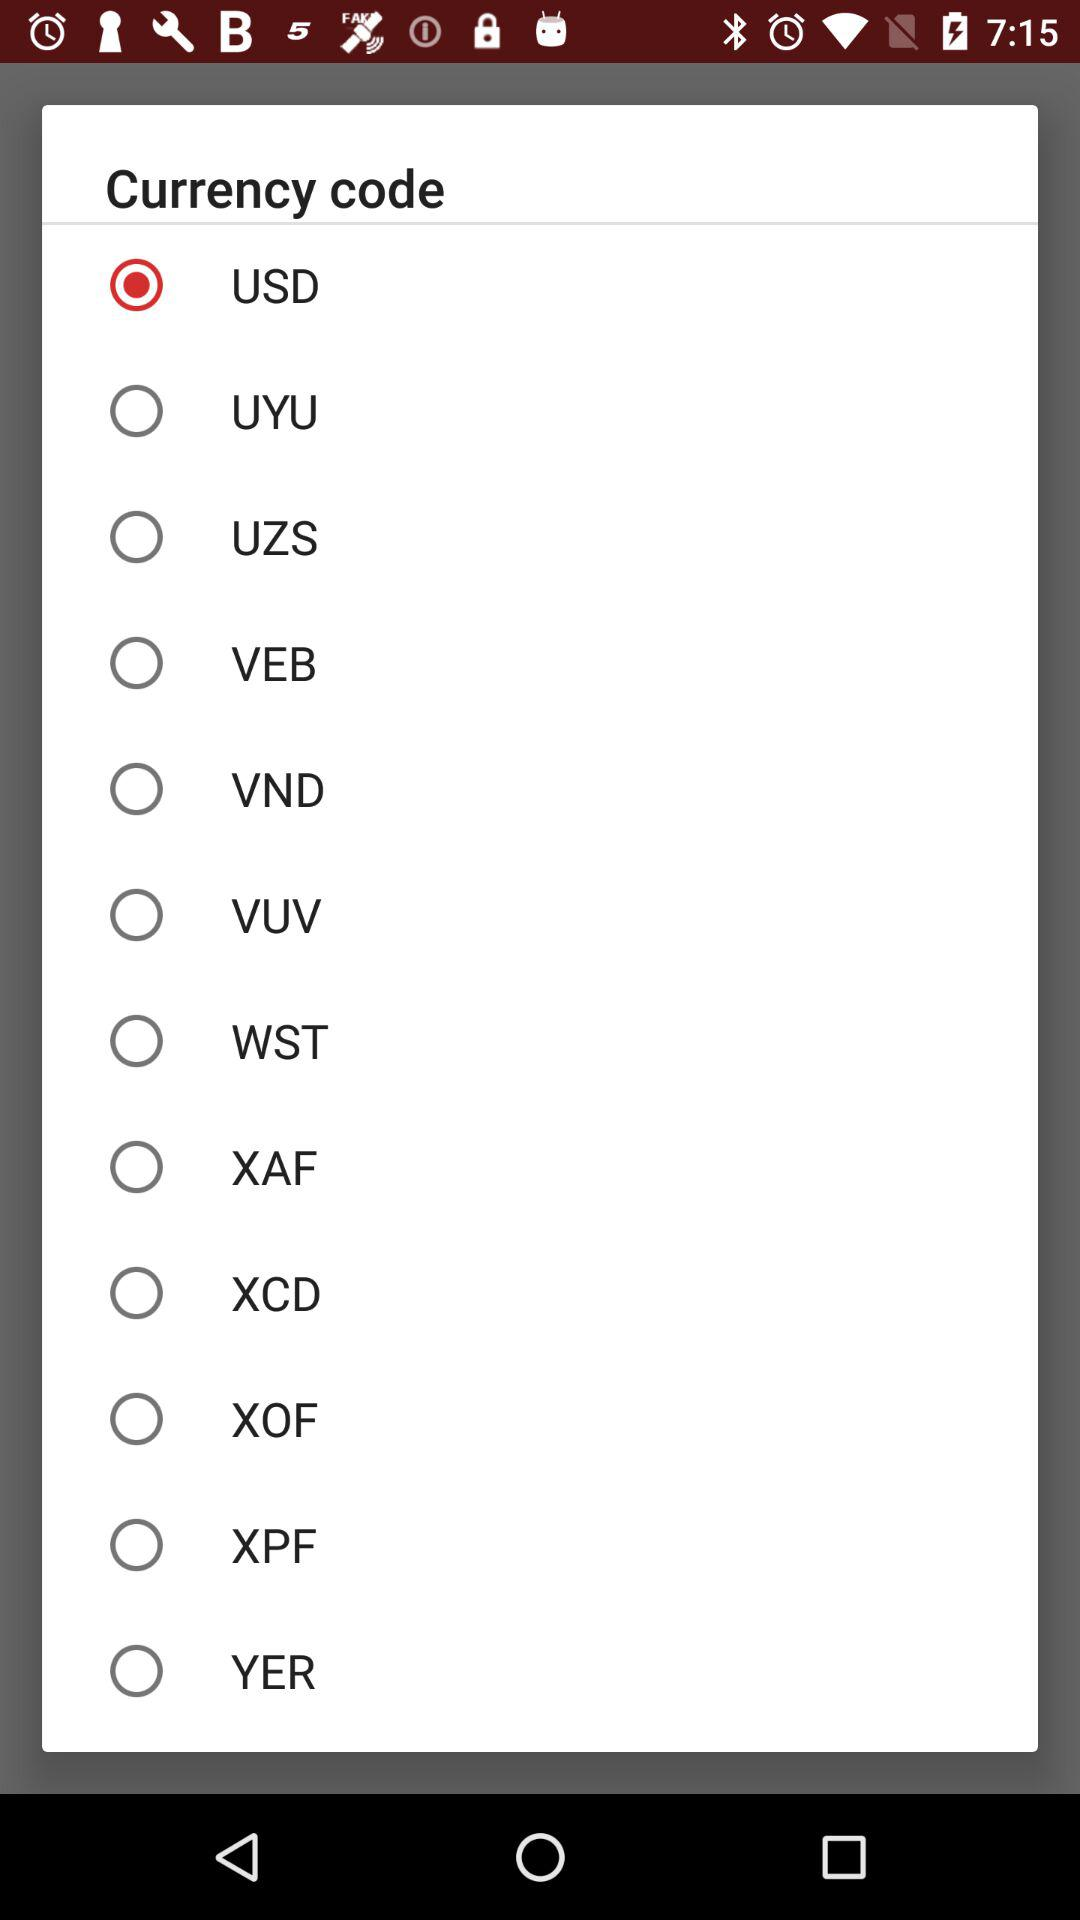

In [127]:
image

In [76]:
inputs = processor(images=[image], text='summarize', return_tensors="pt")

In [79]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [88]:
inputs.input_ids.shape

torch.Size([1, 260])

In [91]:
inputs.attention_mask.shape

torch.Size([1, 260])

In [87]:
inputs.pixel_values.shape

torch.Size([1, 3, 224, 224])

In [121]:
inputs.input_ids

tensor([[257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
         257152, 257152, 257

In [119]:
processor.tokenizer.decode(257152)

'<image>'

In [118]:
sum(inputs.input_ids[0] == 257152)

tensor(256)

In [122]:
processor.tokenizer.decode(2)

'<bos>'

In [125]:
processor.tokenizer.decode([203819, 889])

'summarize'

In [126]:
processor.tokenizer.decode(108)

'\n'

In [116]:
processor.tokenizer.decode(inputs.input_ids[0])

'<image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><imag

In [106]:
processor.tokenizer.decode(processor.tokenizer.encode('Hello world'))

'Hello world'

In [92]:
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id)

C:\Users\milia.io\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\paligemma\configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [95]:
model.config

PaliGemmaConfig {
  "_name_or_path": "google/paligemma-3b-pt-224",
  "architectures": [
    "PaliGemmaForConditionalGeneration"
  ],
  "bos_token_id": 2,
  "eos_token_id": 1,
  "hidden_size": 2048,
  "ignore_index": -100,
  "image_token_index": 257152,
  "model_type": "paligemma",
  "pad_token_id": 0,
  "projection_dim": 2048,
  "text_config": {
    "hidden_size": 2048,
    "intermediate_size": 16384,
    "model_type": "gemma",
    "num_attention_heads": 8,
    "num_hidden_layers": 18,
    "num_image_tokens": 256,
    "num_key_value_heads": 1,
    "torch_dtype": "float32",
    "vocab_size": 257216
  },
  "torch_dtype": "float32",
  "transformers_version": "4.44.2",
  "vision_config": {
    "hidden_size": 1152,
    "intermediate_size": 4304,
    "model_type": "siglip_vision_model",
    "num_attention_heads": 16,
    "num_hidden_layers": 27,
    "num_image_tokens": 256,
    "patch_size": 14,
    "projection_dim": 2048,
    "projector_hidden_act": "gelu_fast",
    "vision_use_head": false

In [96]:
model

PaliGemmaForConditionalGeneration(
  (vision_tower): SiglipVisionModel(
    (vision_model): SiglipVisionTransformer(
      (embeddings): SiglipVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(256, 1152)
      )
      (encoder): SiglipEncoder(
        (layers): ModuleList(
          (0-26): 27 x SiglipEncoderLayer(
            (self_attn): SiglipSdpaAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): SiglipMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_features

In [166]:
inputs = processor(images=image, text="Select XOF?", return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=100)

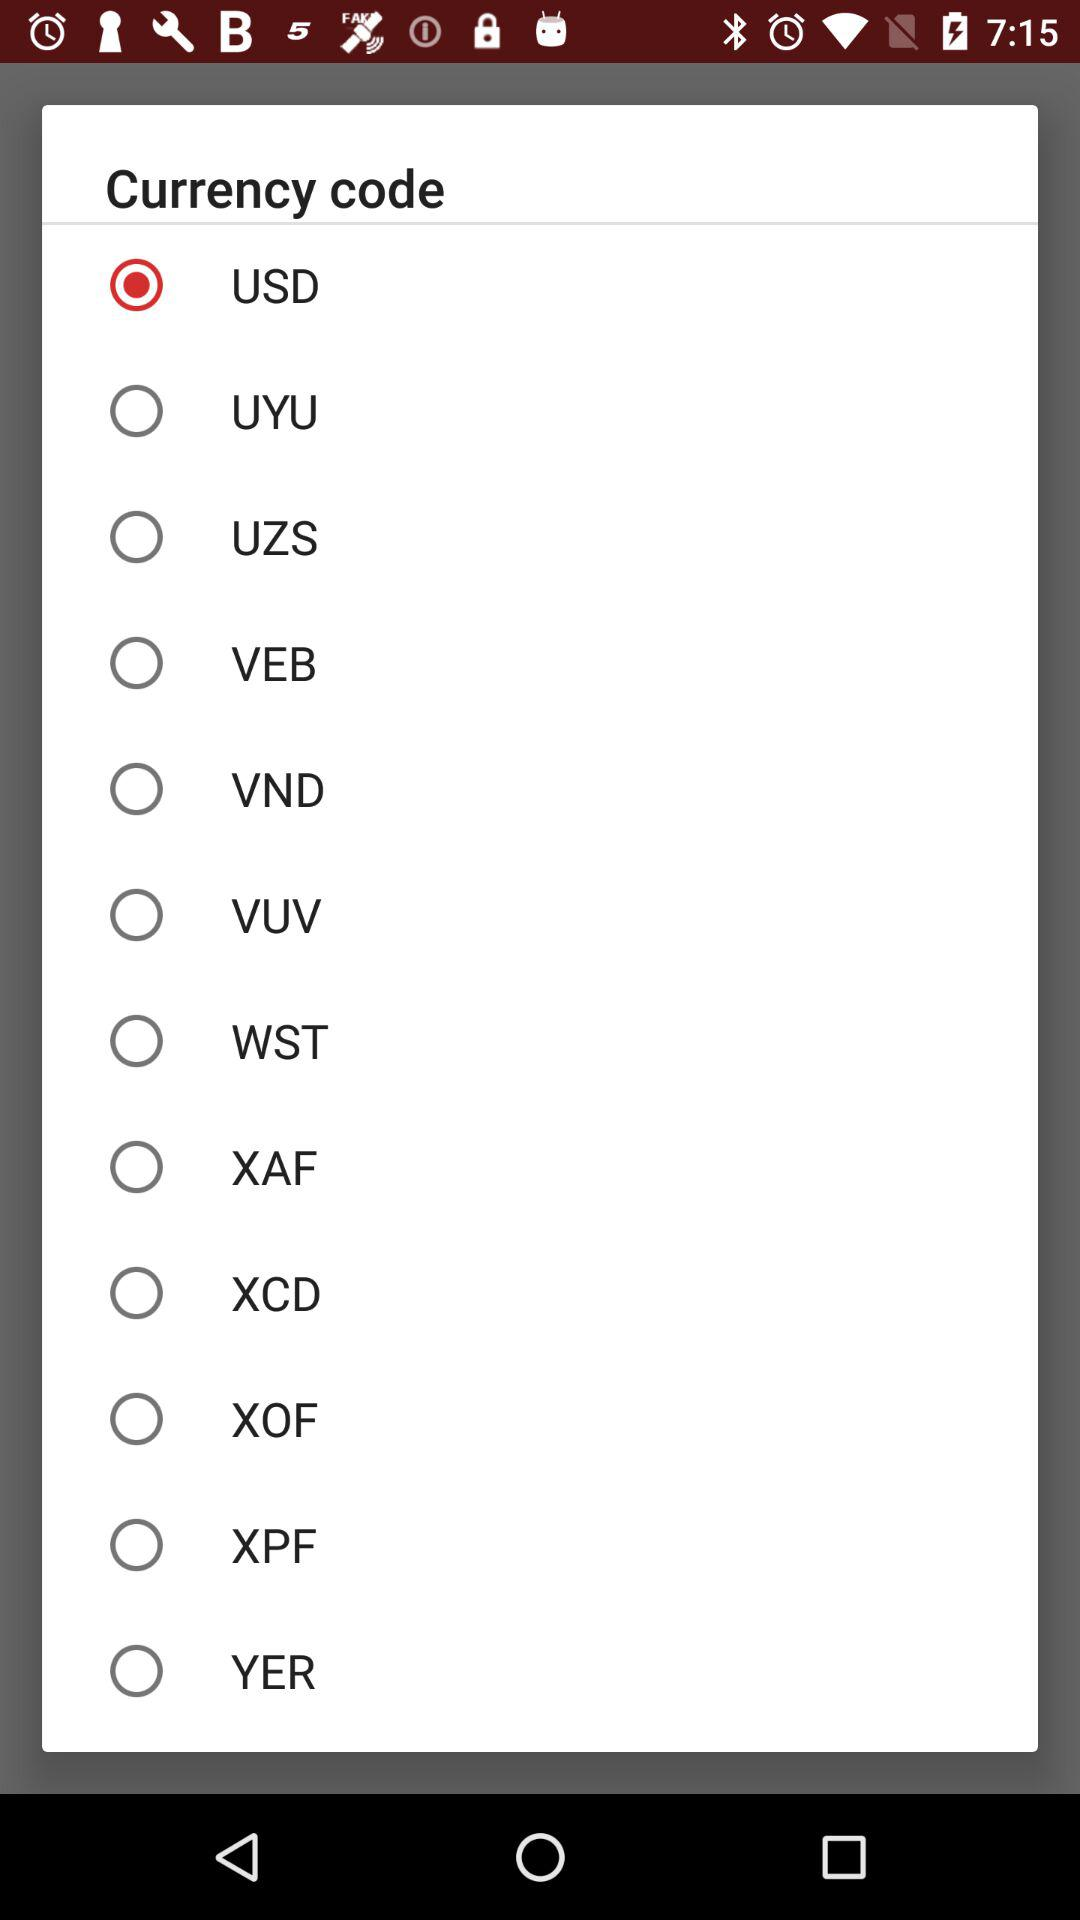

In [159]:
image

In [153]:
output[0]

tensor([257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152, 257152,
        257152, 257152, 257152, 257152, 

In [167]:
print(processor.decode(output[0], skip_special_tokens=True))

Select XOF?
no
